In [7]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.impute import SimpleImputer

In [3]:
a=1
b=2
a+b

3

In [9]:
dataf = pd.read_csv('merged_data_metal.csv')

In [10]:
dataf

rho        E     mu  r   h        f1        f2        f3  \
0       6110.000  128.000  0.370  1   4  0.348127  0.559272  0.638251   
1       7310.000   50.000  0.360  1   4  0.891191  0.900242  0.913946   
2       6511.000   67.000  0.340  1   4  0.853137  0.872592  0.872599   
3       7010.000   41.000  0.280  1   4  0.921685  0.921699  0.921855   
4       8570.000  105.000  0.400  1   4  0.783142  0.784656  0.818507   
...          ...      ...    ... ..  ..       ...       ...       ...   
179547  5932.936   20.013  0.253  5  10  0.998923  0.998991  0.999065   
179548  9728.582   89.462  0.354  5  10  0.996476  0.996479  0.996710   
179549  9333.639   27.532  0.348  5  10  0.999052  0.999164  0.999248   
179550  7779.957   46.750  0.345  5  10  0.997514  0.997995  0.998805   
179551  6207.304  101.549  0.343  5  10  0.991753  0.992685  0.992688   

              f4        f5  ...       f21       f22       f23       f24  \
0       0.638253  0.691341  ...  1.206291  1.235776  1.235786  1.269619   
1       0.913960  0.915949  ...  1.041038  1.041144  1.041182  1.061618   
2       0.894212  0.894216  ...  1.018511  1.069492  1.069497  1.099565   
3       0.921876  0.945647  ...  1.045401  1.048186  1.053257  1.053271   
4       0.818516  0.914237  ...  1.085611  1.085717  1.087111  1.087123   
...          ...       ...  ...       ...       ...       ...       ...   
179547  0.999224  0.999226  ...  1.000398  1.000426  1.000517  1.000526   
179548  0.996832  0.997092  ...  1.001355  1.001520  1.001811  1.002259   
179549  0.999288  0.999403  ...  1.000390  1.000415  1.000434  1.000593   
179550  0.998816  0.999065  ...  1.000950  1.001700  1.001733  1.001787   
179551  0.995743  0.995953  ...  1.000250  1.000569  1.000618  1.001323   

             f25       f26       f27       f28       f29       f30  
0       1.269642  1.275225  1.275232  1.314984  1.361836       NaN  
1       1.061637  1.086306       NaN       NaN       NaN       NaN  
2       1.099605  1.108222  1.127754  1.127770  1.130671       NaN  
3       1.058687  1.058733  1.059723  1.059752  1.060328  1.060367  
4       1.088608  1.088717  1.153545  1.153553  1.178882       NaN  
...          ...       ...       ...       ...       ...       ...  
179547  1.000757  1.000854  1.000908  1.000934  1.000938  1.000944  
179548  1.002673  1.002673  1.003089  1.003194  1.003271  1.003319  
179549  1.000686  1.000754  1.000780  1.000886  1.000917  1.000970  
179550  1.002124  1.002185  1.002239  1.002529  1.002651  1.002740  
179551  1.001461  1.001760  1.006367  1.007153  1.007869  1.007955  

[179552 rows x 35 columns]

In [11]:
X = dataf[['rho','r','h', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20']]
# dataf['E']=dataf['E']*10
dataf['mu']= dataf['mu']*10000

Y = dataf[['E', 'mu']]

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
Y_imputed = imputer.fit_transform(Y)

# Standardize the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_imputed, test_size=0.01, random_state=42)

In [8]:
y_test

array([[ 113.516, 3500.   ],
       [ 101.324, 3590.   ],
       [  29.021, 3430.   ],
       ...,
       [  61.255, 3540.   ],
       [  58.822, 2890.   ],
       [ 102.916, 2630.   ]])

In [ ]:
model = Sequential()
model.add(Dense(256, input_dim=X_scaled.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
# model.add(Dense(4, activation='relu'))
model.add(Dense(2))  # Output layer with 2 neurons for E and mu
from keras.optimizers import Adam

# Create an instance of the Adam optimizer with a specified learning rate
adam_optimizer = Adam(learning_rate=0.001)
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=1000, batch_size=16, validation_split=0.1)

C:\Users\Ayush Rai\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
9999/9999 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - loss: 330455.8125 - val_loss: 66989.7031
Epoch 2/1000
9999/9999 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - loss: 57519.2461 - val_loss: 58183.9492
Epoch 3/1000
9999/9999 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 56900.8047 - val_loss: 56722.1836
Epoch 4/1000
9999/9999 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - loss: 55685.0117 - val_loss: 54117.2852
Epoch 5/1000
9999/9999 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 55328.5586 - val_loss: 55168.2930
Epoch 6/1000
9999/9999 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 53964.2930 - val_loss: 54817.8750
Epoch 7/1000
9999/9999 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 54264.2891 - val_loss: 52961.4648
Epoch 8/1000
9999/9999 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - loss: 53832.5273 - val_loss: 52058.5820
Epoch 9/1000
9999/9999 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - loss: 53636.9805 - val_loss: 56473.8477
Epoch 10/1000
9999/9999 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 53230.4922 - val_loss: 57171.7539
Epoch 11

In [ ]:
# Predictions on the test set
from scipy import stats

y_pred  = model.predict(X_test)
# Calculate Mean Squared Error
mse_column1 = mean_squared_error(y_test[:, 0], y_pred[:, 0])
mse_column2 = mean_squared_error(y_test[:, 1], y_pred[:, 1])

print(f'Mean Squared Error for E: {mse_column1}')
print(f'Mean Squared Error for mu: {mse_column2}')

# Display the results
results_df = pd.DataFrame({
    'Actual_E': y_test[:, 0],
    'Predicted_E': y_pred[:, 0],
    'Error_E': abs(y_test[:, 0] - y_pred[:, 0]),
    'Actual_mu': y_test[:, 1],
    'Predicted_mu': y_pred[:, 1],
    'Error_mu': abs(y_test[:, 1] - y_pred[:, 1])
})
# results_df['Actual_E'] /= 10
# results_df['Predicted_E'] /= 10
# results_df['Error_E'] /= 10
results_df['Actual_mu'] /= 10000
results_df['Predicted_mu'] /= 10000
results_df['Error_mu'] /= 10000

# Calculate mean absolute error for 'E' and 'mu'
mae_E = results_df['Error_E'].mean()
mae_mu = results_df['Error_mu'].mean()

# Calculate standard deviation for 'E' and 'mu'
std_E = results_df['Error_E'].std()
std_mu = results_df['Error_mu'].std()
results_df['Percentage_Error_E'] = (results_df['Error_E'] / results_df['Actual_E']) * 100
results_df['Percentage_Error_mu'] = (results_df['Error_mu'] / results_df['Actual_mu']) * 100
mape_E = results_df['Percentage_Error_E'].mean()
mape_mu = results_df['Percentage_Error_mu'].mean()

import numpy as np

# Calculate median percentage error for E and mu
median_percentage_error_E = np.median(results_df['Percentage_Error_E'])
median_percentage_error_mu = np.median(results_df['Percentage_Error_mu'])
    # Calculate mode percentage error for E
mode_percentage_error_E = stats.mode(results_df['Percentage_Error_E'])
mode_percentage_error_mu = stats.mode(results_df['Percentage_Error_mu'])

print(f'Median Percentage Error for E: {median_percentage_error_E}')
print(f'Median Percentage Error for mu: {median_percentage_error_mu}')

print(f'Mean Absolute Error for E: {mae_E}')
print(f'Mean Absolute Error for mu: {mae_mu}')
print(f'Standard Deviation for E: {std_E}')
print(f'Standard Deviation for mu: {std_mu}')
print(f'Mode Percentage Error for E: {mode_percentage_error_E} ')
print(f'Mode Percentage Error for E: {mode_percentage_error_mu} ')
print(f'Mean Absolute percentage Error for E: {mape_E}')
print(f'Mean Absolute percentage Error for mu: {mape_mu}')
print(results_df)


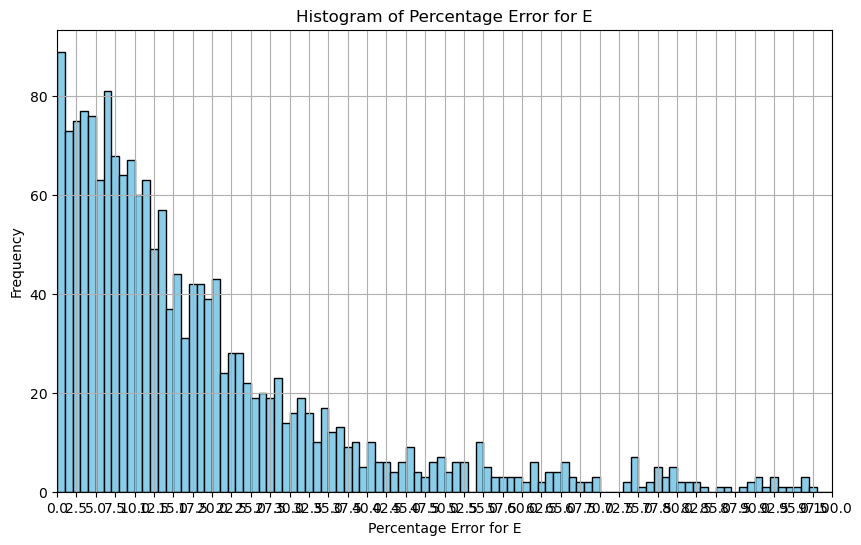

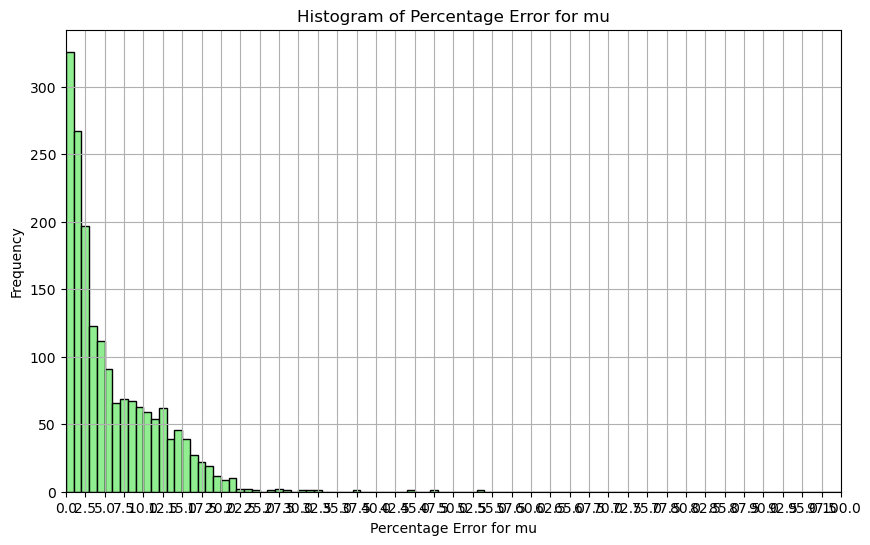

Maximum Percentage Error for E: 314.32807037486225
Minimum Percentage Error for E: 0.008096690714216396
Maximum Percentage Error for mu: 180.10702659970238
Minimum Percentage Error for mu: 0.008692885890151514


In [16]:
import matplotlib.pyplot as plt

import numpy as np

# Define custom bins for the histogram
custom_bins = np.arange(0, 101, 1)

# Plot histogram of percentage error for E
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_E'], bins=custom_bins, color='skyblue', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for E')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for E')
plt.grid(True)
plt.xticks(np.arange(0, 101, 2.5))  # Set custom x-ticks
plt.show()

# Plot histogram of percentage error for mu
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_mu'], bins=custom_bins, color='lightgreen', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for mu')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for mu')
plt.grid(True)
plt.xticks(np.arange(0, 101, 2.5))  # Set custom x-ticks
plt.show()

# Display maximum and minimum errors for E and mu
max_error_E = results_df['Percentage_Error_E'].max()
min_error_E = results_df['Percentage_Error_E'].min()
max_error_mu = results_df['Percentage_Error_mu'].max()
min_error_mu = results_df['Percentage_Error_mu'].min()

print(f'Maximum Percentage Error for E: {max_error_E}')
print(f'Minimum Percentage Error for E: {min_error_E}')
print(f'Maximum Percentage Error for mu: {max_error_mu}')
print(f'Minimum Percentage Error for mu: {min_error_mu}')

In [4]:
import pickle

In [ ]:
model_file_pickle = "METAL_ANN_model_nu_scaled.pkl"
with open(model_file_pickle, 'wb') as file:
    pickle.dump(model, file)

In [5]:
# Load the model from the file
model_file_pickle = "METAL_ANN_model_nu_scaled.pkl"
with open(model_file_pickle, 'rb') as file:
    model = pickle.load(file)

In [13]:
y_pred1 = model.predict(X_test)

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [15]:
# Predictions on the test set
from scipy import stats

y_pred  = model.predict(X_test)
# Calculate Mean Squared Error
mse_column1 = mean_squared_error(y_test[:, 0], y_pred1[:, 0])
mse_column2 = mean_squared_error(y_test[:, 1], y_pred1[:, 1])

print(f'Mean Squared Error for E: {mse_column1}')
print(f'Mean Squared Error for mu: {mse_column2}')

# Display the results
results_df = pd.DataFrame({
    'Actual_E': y_test[:, 0],
    'Predicted_E': y_pred1[:, 0],
    'Error_E': abs(y_test[:, 0] - y_pred1[:, 0]),
    'Actual_mu': y_test[:, 1],
    'Predicted_mu': y_pred1[:, 1],
    'Error_mu': abs(y_test[:, 1] - y_pred1[:, 1])
})
# results_df['Actual_E'] /= 10
# results_df['Predicted_E'] /= 10
# results_df['Error_E'] /= 10
results_df['Actual_mu'] /= 10000
results_df['Predicted_mu'] /= 10000
results_df['Error_mu'] /= 10000

# Calculate mean absolute error for 'E' and 'mu'
mae_E = results_df['Error_E'].mean()
mae_mu = results_df['Error_mu'].mean()

# Calculate standard deviation for 'E' and 'mu'
std_E = results_df['Error_E'].std()
std_mu = results_df['Error_mu'].std()
results_df['Percentage_Error_E'] = (results_df['Error_E'] / results_df['Actual_E']) * 100
results_df['Percentage_Error_mu'] = (results_df['Error_mu'] / results_df['Actual_mu']) * 100
mape_E = results_df['Percentage_Error_E'].mean()
mape_mu = results_df['Percentage_Error_mu'].mean()

import numpy as np

# Calculate median percentage error for E and mu
median_percentage_error_E = np.median(results_df['Percentage_Error_E'])
median_percentage_error_mu = np.median(results_df['Percentage_Error_mu'])
    # Calculate mode percentage error for E
mode_percentage_error_E = stats.mode(results_df['Percentage_Error_E'])
mode_percentage_error_mu = stats.mode(results_df['Percentage_Error_mu'])

print(f'Median Percentage Error for E: {median_percentage_error_E}')
print(f'Median Percentage Error for mu: {median_percentage_error_mu}')

print(f'Mean Absolute Error for E: {mae_E}')
print(f'Mean Absolute Error for mu: {mae_mu}')
print(f'Standard Deviation for E: {std_E}')
print(f'Standard Deviation for mu: {std_mu}')
print(f'Mode Percentage Error for E: {mode_percentage_error_E} ')
print(f'Mode Percentage Error for E: {mode_percentage_error_mu} ')
print(f'Mean Absolute percentage Error for E: {mape_E}')
print(f'Mean Absolute percentage Error for mu: {mape_mu}')
print(results_df)


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Mean Squared Error for E: 563.1040565992033
Mean Squared Error for mu: 70833.9179157958
Median Percentage Error for E: 12.790248518570351
Median Percentage Error for mu: 3.879922126535174
Mean Absolute Error for E: 13.161028514751614
Mean Absolute Error for mu: 0.018197760213669263
Standard Deviation for E: 19.75116692042154
Standard Deviation for mu: 0.01942654963931445
Mode Percentage Error for E: ModeResult(mode=2.3355107422256083, count=2) 
Mode Percentage Error for E: ModeResult(mode=1.9115402037838853, count=2) 
Mean Absolute percentage Error for E: 21.11065817168177
Mean Absolute percentage Error for mu: 6.072194067536847
      Actual_E  Predicted_E    Error_E  Actual_mu  Predicted_mu  Error_mu  \
0      113.516   120.020309   6.504309      0.350      0.309619  0.040381   
1      101.324   139.801941  38.477941      0.359      0.319571  0.039429   
2       29.021    32.625870   3.604870      0.343      0.350792  0.007792   
3       36.010  